In [1]:
import pandas as pd

In [4]:
df = pd.read_csv('ads_data.csv')
df_client = pd.read_csv('ads_clients_data.csv')

In [5]:
df.head()

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269
1,2019-04-01,2019-04-01 00:00:48,view,web,121288,121288,121288,CPM,187.4,0,232011
2,2019-04-01,2019-04-01 00:01:03,view,android,102737,102535,102564,CPC,60.7,0,4410
3,2019-04-01,2019-04-01 00:01:03,view,android,107564,106914,107564,CPM,217.3,0,62711
4,2019-04-01,2019-04-01 00:01:09,view,android,4922,37,4400,CPC,60.1,0,1183501


In [6]:
df_client.head()

,date,client_union_id,community_id,create_date
0,2020-05-07,1,-130371893,2018-12-24
1,2020-05-07,2,-130304626,2019-02-10
2,2020-05-07,3,-130462599,2019-01-25
3,2020-05-07,4,-130574300,2018-12-09
4,2020-05-07,5,-130292358,2019-01-08


In [17]:
event = df.groupby(['ad_id', 'event'], as_index=False).agg({'time' : 'count'}) \
    .rename(columns={'time' : 'event_number'})

In [24]:
pivot_events = event.pivot(index='ad_id', columns = 'event', values='event_number').fillna(0)

In [28]:
pivot_events.mean().round()

event
click    113.0
view     923.0
dtype: float64

In [34]:
#another path
round(event.groupby('event').agg({'event_number' : 'sum'}) / df.ad_id.nunique())

,event_number
event,
click,113.0
view,923.0


In [31]:
df.ad_id.nunique()

965

In [38]:
views = event.query('event == "view"')

In [39]:
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='event_number', ylabel='Density'>

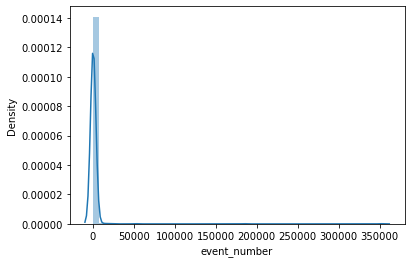

In [40]:
sns.distplot(views.event_number)

In [41]:
import numpy as np

In [42]:
views

,ad_id,event,event_number
1,2,view,101
3,3,view,184
5,1902,view,41
6,2064,view,35
8,2132,view,58
...,...,...,...
1475,122004,view,100
1476,122013,view,156
1477,122023,view,68
1479,122031,view,138


In [44]:
views['logorifm'] = np.log(views.event_number)

<ipython-input-44-faa766f943fd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  views['logorifm'] = np.log(views.event_number)


In [45]:
views

,ad_id,event,event_number,logorifm
1,2,view,101,4.615121
3,3,view,184,5.214936
5,1902,view,41,3.713572
6,2064,view,35,3.555348
8,2132,view,58,4.060443
...,...,...,...,...
1475,122004,view,100,4.605170
1476,122013,view,156,5.049856
1477,122023,view,68,4.219508
1479,122031,view,138,4.927254


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='logorifm', ylabel='Density'>

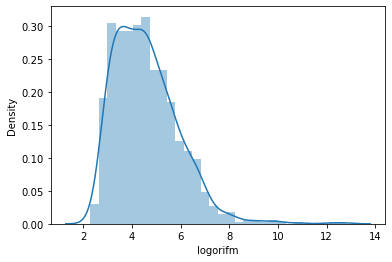

In [46]:
sns.distplot(views.logorifm)

In [50]:
df

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269
1,2019-04-01,2019-04-01 00:00:48,view,web,121288,121288,121288,CPM,187.4,0,232011
2,2019-04-01,2019-04-01 00:01:03,view,android,102737,102535,102564,CPC,60.7,0,4410
3,2019-04-01,2019-04-01 00:01:03,view,android,107564,106914,107564,CPM,217.3,0,62711
4,2019-04-01,2019-04-01 00:01:09,view,android,4922,37,4400,CPC,60.1,0,1183501
...,...,...,...,...,...,...,...,...,...,...,...
999995,2019-04-05,2019-04-05 20:59:52,view,web,112583,111818,112260,CPM,210.1,0,22392
999996,2019-04-05,2019-04-05 20:59:52,view,android,112583,111818,112260,CPM,210.1,0,22392
999997,2019-04-05,2019-04-05 20:59:52,click,web,112583,111818,112260,CPM,210.1,0,22392
999998,2019-04-05,2019-04-05 20:59:52,view,web,113350,113036,113251,CPM,183.3,0,571929


In [69]:
view_per_day = df.query('event == "view"') \
    .pivot_table(index='ad_id', columns='date', values='time', aggfunc='count')

In [101]:
view_per_day

date,2019-04-01,2019-04-02,2019-04-03,2019-04-04,2019-04-05,2019-04-06
ad_id,,,,,,
2,83.0,18.0,NaN,NaN,NaN,NaN
3,158.0,26.0,NaN,NaN,NaN,NaN
1902,NaN,NaN,34.0,7.0,NaN,NaN
2064,NaN,28.0,7.0,NaN,NaN,NaN
2132,NaN,NaN,25.0,27.0,6.0,NaN
...,...,...,...,...,...,...
122004,85.0,15.0,NaN,NaN,NaN,NaN
122013,NaN,NaN,NaN,134.0,22.0,NaN
122023,NaN,NaN,NaN,53.0,15.0,NaN


In [73]:
view_per_day.mean().rolling(2).mean()

date
2019-04-01           NaN
2019-04-02    146.134626
2019-04-03    150.869880
2019-04-04    419.927249
2019-04-05    797.505699
2019-04-06    598.116202
dtype: float64

In [74]:
mean_views = view_per_day.mean()

In [75]:
mean_views

date
2019-04-01    154.482270
2019-04-02    137.786982
2019-04-03    163.952778
2019-04-04    675.901720
2019-04-05    919.109677
2019-04-06    277.122727
dtype: float64

In [76]:
rolling_mean_views = mean_views.rolling(2).mean()

In [77]:
rolling_mean_views

date
2019-04-01           NaN
2019-04-02    146.134626
2019-04-03    150.869880
2019-04-04    419.927249
2019-04-05    797.505699
2019-04-06    598.116202
dtype: float64

<AxesSubplot:xlabel='date'>

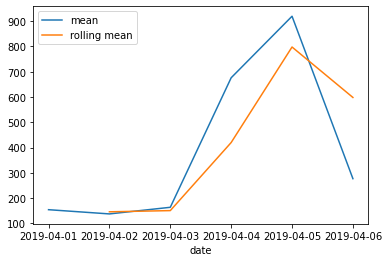

In [80]:
sns.lineplot(data=mean_views, label='mean')
sns.lineplot(data=rolling_mean_views, label='rolling mean')

In [85]:
#Дата з аномалією
anomaly_day = (mean_views - rolling_mean_views).abs().idxmax()

In [97]:
difference_value = mean_views.subtract(rolling_mean_views) [anomaly_day]

In [99]:
if difference_value <= 0:
    anomaly_id = view_per_day[anomaly_day].idxmax()
else:
    anomaly_id = view_per_day[anomaly_day].idxmin()

In [100]:
anomaly_id

112583

In [84]:
view_per_day['2019-04-06']

ad_id
2          NaN
3          NaN
1902       NaN
2064       NaN
2132       NaN
          ... 
122004     NaN
122013     NaN
122023     NaN
122031    19.0
122078     NaN
Name: 2019-04-06, Length: 956, dtype: float64

In [105]:
def find_anomaly_id(ad_view_per_day):
    mean_views = ad_view_per_day.mean()
    mean_difference = mean_views.subtract(rolling_mean_views)
    anomaly_day = mean_difference.abs().idxmax()
    difference_value = mean_difference [anomaly_day]
    if difference_value <= 0:
        anomaly_id = ad_view_per_day[anomaly_day].idxmax()
    else:
        anomaly_id = ad_view_per_day[anomaly_day].idxmin()
        
    return anomaly_id

In [103]:
view_per_day

date,2019-04-01,2019-04-02,2019-04-03,2019-04-04,2019-04-05,2019-04-06
ad_id,,,,,,
2,83.0,18.0,NaN,NaN,NaN,NaN
3,158.0,26.0,NaN,NaN,NaN,NaN
1902,NaN,NaN,34.0,7.0,NaN,NaN
2064,NaN,28.0,7.0,NaN,NaN,NaN
2132,NaN,NaN,25.0,27.0,6.0,NaN
...,...,...,...,...,...,...
122004,85.0,15.0,NaN,NaN,NaN,NaN
122013,NaN,NaN,NaN,134.0,22.0,NaN
122023,NaN,NaN,NaN,53.0,15.0,NaN


In [108]:
#next level

In [106]:
find_anomaly_id(view_per_day)

112583

In [107]:
df_client

,date,client_union_id,community_id,create_date
0,2020-05-07,1,-130371893,2018-12-24
1,2020-05-07,2,-130304626,2019-02-10
2,2020-05-07,3,-130462599,2019-01-25
3,2020-05-07,4,-130574300,2018-12-09
4,2020-05-07,5,-130292358,2019-01-08
...,...,...,...,...
122073,2020-05-07,122074,-130470790,2018-12-21
122074,2020-05-07,122075,-130911261,2018-11-09
122075,2020-05-07,122076,-130494912,2018-10-27
122076,2020-05-07,122077,-130910585,2018-12-05


In [109]:
df

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269
1,2019-04-01,2019-04-01 00:00:48,view,web,121288,121288,121288,CPM,187.4,0,232011
2,2019-04-01,2019-04-01 00:01:03,view,android,102737,102535,102564,CPC,60.7,0,4410
3,2019-04-01,2019-04-01 00:01:03,view,android,107564,106914,107564,CPM,217.3,0,62711
4,2019-04-01,2019-04-01 00:01:09,view,android,4922,37,4400,CPC,60.1,0,1183501
...,...,...,...,...,...,...,...,...,...,...,...
999995,2019-04-05,2019-04-05 20:59:52,view,web,112583,111818,112260,CPM,210.1,0,22392
999996,2019-04-05,2019-04-05 20:59:52,view,android,112583,111818,112260,CPM,210.1,0,22392
999997,2019-04-05,2019-04-05 20:59:52,click,web,112583,111818,112260,CPM,210.1,0,22392
999998,2019-04-05,2019-04-05 20:59:52,view,web,113350,113036,113251,CPM,183.3,0,571929


In [111]:
full_data = df.merge(df_client.drop(columns=['date', 'community_id']))

In [113]:
full_data.head()

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count,create_date
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269,2018-12-04
1,2019-04-01,2019-04-01 00:03:28,view,android,45061,34734,45061,CPM,200.6,0,1955269,2018-12-04
2,2019-04-01,2019-04-01 00:04:58,view,ios,45061,34734,45061,CPM,200.6,0,1955269,2018-12-04
3,2019-04-01,2019-04-01 00:10:23,view,ios,45061,34734,45061,CPM,200.6,0,1955269,2018-12-04
4,2019-04-01,2019-04-01 00:15:42,view,android,45061,34734,45061,CPM,200.6,0,1955269,2018-12-04


In [116]:
 full_data[['date', 'create_date']] = full_data[['date', 'create_date']].apply(pd.to_datetime)

In [117]:
full_data.dtypes

date                     datetime64[ns]
time                             object
event                            object
platform                         object
ad_id                             int64
client_union_id                   int64
campaign_union_id                 int64
ad_cost_type                     object
ad_cost                         float64
has_video                         int64
target_audience_count             int64
create_date              datetime64[ns]
dtype: object

In [120]:
full_data.groupby('client_union_id') \
    .apply(lambda group: (group.date - group.create_date).min()) \
    .mean()

Timedelta('124 days 09:04:43.532219570')

In [121]:
timehold = pd.to_timedelta('365d')
timehold

Timedelta('365 days 00:00:00')

In [122]:
diff_date = full_data.groupby('client_union_id') \
    .apply(lambda group: (group.date - group.create_date).min())

In [123]:
diff_date

client_union_id
1         98 days
9        114 days
13        66 days
16       105 days
20        32 days
           ...   
122004    67 days
122013   151 days
122023   126 days
122031    96 days
122078    71 days
Length: 838, dtype: timedelta64[ns]

In [129]:
diff_date = diff_date.loc[diff_date < timehold]
diff_date

client_union_id
1         98 days
9        114 days
13        66 days
16       105 days
20        32 days
           ...   
122004    67 days
122013   151 days
122023   126 days
122031    96 days
122078    71 days
Length: 838, dtype: timedelta64[ns]

In [134]:
round(diff_date.shape[0] / df_client.client_union_id.nunique() * 100, 2)

0.69

In [138]:
pd.cut(diff_date, 4)

client_union_id
1          (82 days 06:00:00, 138 days 12:00:00]
9          (82 days 06:00:00, 138 days 12:00:00]
13          (25 days 18:36:00, 82 days 06:00:00]
16         (82 days 06:00:00, 138 days 12:00:00]
20          (25 days 18:36:00, 82 days 06:00:00]
                           ...                  
122004      (25 days 18:36:00, 82 days 06:00:00]
122013    (138 days 12:00:00, 194 days 18:00:00]
122023     (82 days 06:00:00, 138 days 12:00:00]
122031     (82 days 06:00:00, 138 days 12:00:00]
122078      (25 days 18:36:00, 82 days 06:00:00]
Length: 838, dtype: category
Categories (4, interval[timedelta64[ns]]): [(25 days 18:36:00, 82 days 06:00:00] < (82 days 06:00:00, 138 days 12:00:00] < (138 days 12:00:00, 194 days 18:00:00] < (194 days 18:00:00, 251 days 00:00:00]]

In [140]:
bins = pd.to_timedelta([0, 30, 90, 180, 365], unit='d')

In [144]:
pd.cut(diff_date, bins=bins, labels=['0-30', '30-90', '90-180', '180-365']).value_counts()

90-180     396
30-90      263
180-365    168
0-30        11
dtype: int64

In [148]:
conda install -c https://conda.anaconda.org/plotly plotly

^C

Note: you may need to restart the kernel to use updated packages.


In [149]:
import sys
!conda install --yes --prefix {sys.prefix} plotly

WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(143): Could not remove or rename C:\Users\Миненко\.conda\pkgs\plotly-5.10.0-py_0.tar.bz2.  Please remove this file manually (you may need to reboot to free file handles)

InvalidArchiveError("Error with archive C:\\Users\\Миненко\\.conda\\pkgs\\conda-4.14.0-py38haa95532_0yie9jo0t\\info-conda-4.14.0-py38haa95532_0.tar.zst.  You probably need to delete and re-download or re-create this file.  Message from libarchive was:\n\nFailed to open 'C:\\Users\\Миненко\\.conda\\pkgs\\conda-4.14.0-py38haa95532_0yie9jo0t\\info-conda-4.14.0-py38haa95532_0.tar.zst'")
InvalidArchiveError("Error with archive C:\\Users\\Миненко\\.conda\\pkgs\\plotly-5.9.0-py38haa95532_07sn525sh\\info-plotly-5.9.0-py38haa95532_0.tar.zst.  You probably need to delete and re-download or re-create this file.  Message from libarchive was:\n\nFailed to open 'C:\\Users\\Миненко\\.conda\\pkgs\\plotly-5.9.0-py38haa95532_07sn525sh\\info-plotly-5.9.0-py38haa95532_0.tar.zst


Solving environment: ...working... done

## Package Plan ##

  environment location: C:\ProgramData\Anaconda3

  added / updated specs:
    - plotly


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.14.0               |   py38haa95532_0         936 KB
    plotly-5.9.0               |   py38haa95532_0         4.1 MB
    tenacity-8.0.1             |   py38haa95532_1          34 KB
    ------------------------------------------------------------
                                           Total:         5.0 MB

The following NEW packages will be INSTALLED:

  plotly             pkgs/main/win-64::plotly-5.9.0-py38haa95532_0
  tenacity           pkgs/main/win-64::tenacity-8.0.1-py38haa95532_1

The following packages will be UPDATED:

  conda                               4.10.3-py38haa95532_0 --> 4.14.0-py38haa95532_0




conda-4.14.0         | 936 KB    |            |   0% 
conda-4.1


InvalidArchiveError("Error with archive C:\\Users\\Миненко\\.conda\\pkgs\\conda-4.14.0-py38haa95532_06nlk0v1w\\info-conda-4.14.0-py38haa95532_0.tar.zst.  You probably need to delete and re-download or re-create this file.  Message from libarchive was:\n\nFailed to open 'C:\\Users\\Миненко\\.conda\\pkgs\\conda-4.14.0-py38haa95532_06nlk0v1w\\info-conda-4.14.0-py38haa95532_0.tar.zst'")
InvalidArchiveError("Error with archive C:\\Users\\Миненко\\.conda\\pkgs\\tenacity-8.0.1-py38haa95532_18ttuao_5\\info-tenacity-8.0.1-py38haa95532_1.tar.zst.  You probably need to delete and re-download or re-create this file.  Message from libarchive was:\n\nFailed to open 'C:\\Users\\Миненко\\.conda\\pkgs\\tenacity-8.0.1-py38haa95532_18ttuao_5\\info-tenacity-8.0.1-py38haa95532_1.tar.zst'")

